In [14]:
import os
import random
from tqdm import tqdm
from PIL import Image
from tqdm import tqdm
from glob import glob
import pandas as pd
import cv2
from config import data_folder
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
categories = os.listdir(data_folder)
file_id = []
label = []
for category in tqdm(categories):
    images = glob(os.path.join(data_folder, category) + '/*.jpg')  # 这里可以观察一下数据集，发现图片均为jpg格式，正则匹配比较简单
    for img in images:
        file_id.append(img)
        label.append(category)
df_description = pd.DataFrame({'file_id': file_id, 'label': label})
df_description.to_csv('../data/description.csv', encoding='utf8', index=False)  # 落地这个csv文件是为了更符合常见的数据集说明文件

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.85it/s]


In [5]:
df_data = pd.read_csv('../data/description.csv', encoding='utf8')
df_data.sample(5)

,file_id,label
5065,../data/FacialExpression/1\happiness-16332.jpg,1
22067,../data/FacialExpression/2\neutral-23398.jpg,2
24504,../data/FacialExpression/2\neutral-26905.jpg,2
14858,../data/FacialExpression/2\neutral-12164.jpg,2
21156,../data/FacialExpression/2\neutral-22145.jpg,2


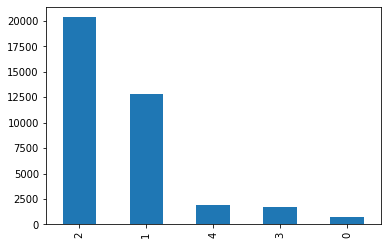

In [12]:
df_data['label'].value_counts().plot(kind='bar')
plt.savefig('../assets/distribution.png')
plt.show()

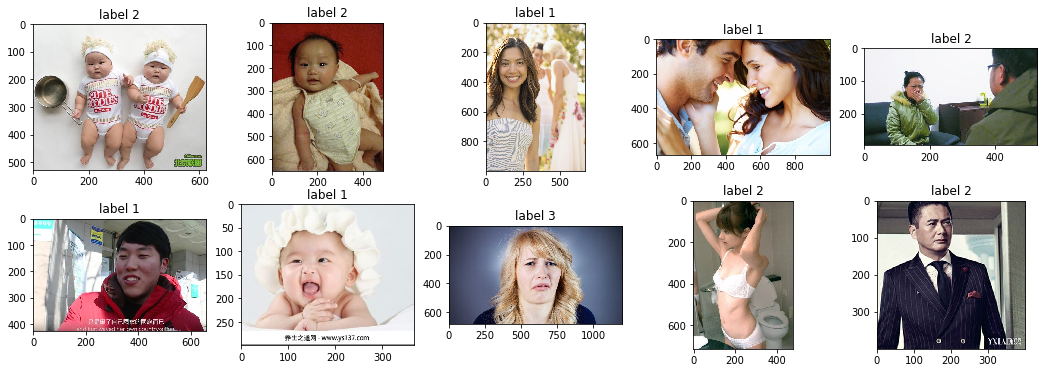

In [25]:
datasize = len(df_data)
sample_index = random.sample(list(range(datasize)), 10)
plt.figure(figsize=(18, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = cv2.imread(df_data['file_id'][sample_index[i]])
    img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    label = str(df_data['label'][sample_index[i]])
    plt.title("label {}".format(label))
plt.savefig('../assets/data_sample.png')
plt.show()